<a href="https://colab.research.google.com/github/Aijeyomah/resturant-price-detector/blob/main/data_science(restaurant).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WHAT: In this block of code, we are importing various models which we want to use for data analysis

 WHY: We are importing the matplotlib to display our output in our note book enviroment. We are importing these other python modules to use in to our environment to be able to access it in our code.

In [ ]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

WHAT: We are loading the nyc_url.CSV file and assigning it to a variable 

WHY: We are reading and converting the nyc_url.CSV file into a panda dataframe to enable us access and manipulate the datasets inside

In [ ]:
nyc_url = "https://assets.datacamp.com/production/repositories/845/datasets/639a7a3f9020edb51bcbc4bfdb7b71cbd8b9a70e/nyc.csv"
nyc = pd.read_csv(nyc_url)
nyc.head()

,Case,Restaurant,Price,Food,Decor,Service,East
0,1,Daniella Ristorante,43,22,18,20,0
1,2,Tello's Ristorante,32,20,19,19,0
2,3,Biricchino,34,21,13,18,0
3,4,Bottino,41,20,20,17,0
4,5,Da Umberto,54,24,19,21,0


WHAT: In this block of code, we are dropping all the null values in the dataset

WHY: We are dropping the null values and saving it back into that variable to enable us have a cleaner dataset.

In [ ]:
nycData = nyc.dropna()

WHAT: Dropping duplicates in the dataset

WHY: We are using the drop duplicate function to drop all the duplicates in our nycData to enable us have cleaner codes

In [ ]:
nycData = nycData.drop_duplicates()

WHAT: We made use of the .info function so that we can understand the type of values that exist in our columns.

WHY: This block of code uses the .info function to get all information about the Boston data

In [ ]:
nycData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Case        168 non-null    int64 
 1   Restaurant  168 non-null    object
 2   Price       168 non-null    int64 
 3   Food        168 non-null    int64 
 4   Decor       168 non-null    int64 
 5   Service     168 non-null    int64 
 6   East        168 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 10.5+ KB


WHAT: we are using describe function on the nycData dataset.

we are passing np.number into the include keyword argument.

.T is used to transpose the result


WHY: we are using describe to get statistical information about the data.

The include function is used to ensure analysis is also run on the series that have numpy number datatype.
we transpose the result so we can have a better layout 

In [ ]:
nyc.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Case,168.0,84.500000,48.641546,1.0,42.75,84.5,126.25,168.0
Price,168.0,42.696429,9.292814,19.0,36.00,43.0,50.00,65.0
Food,168.0,20.595238,1.982674,16.0,19.00,20.5,22.00,25.0
Decor,168.0,17.690476,2.702743,6.0,16.00,18.0,19.00,25.0
Service,168.0,19.398810,2.113940,14.0,18.00,20.0,21.00,24.0
East,168.0,0.630952,0.483989,0.0,0.00,1.0,1.00,1.0


WHAT: we assigned a random number to seed

we use the drop function to drop the price column from our dataframe and save dataframe inside a variable x
we save the price column into a variable y

we assigned 0.3 to test_data_size. we used the train_test_split function to split the x and y variables. 

we set our test_size to test_data_size


we set our random_state to seed, we use the concat function on the x_train and y_train to join both into a dataframe and save it into the train_data.


the same was done for the x_test and y_test and the resulting dataframe was saved into the test_data

WHY: 
 we used the drop function on our dataframe so that we can separate our dependent and independent variables and save them into different variables.seed is a random number assigned to random state in the train_test_split function. so that when the function is performed we will ge the same output with the same data. we are dividing our dataset into 2 so that One can for training and one for testing. test data is 30% of the overall dataset. 

In [ ]:
y = nycData[['Price']]
X = nycData[['Food', 'Decor', 'Service', 'East']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 123 )
train_data = pd.concat([X_train,y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis = 1)

WHAT: we define a correlation matrix with a method of pearson and save it in a variable corrMatrix

we list out all the columns in the train data and save it into the xnames and ynames variables

we call the plot_corr function and pass in our correlation matrix, we assign out xnames variable to our xname keyword argument, we also assign our ynames variable to our yname argument

WHY: we created a correlation matrix to provide a visual representation of the correlation between the variables in the dataset. Pearson correlation coefficient was the method used to obtain our coefficients. we are trying to determine which independent variables have a strong correlation with our dependent variable(price). 

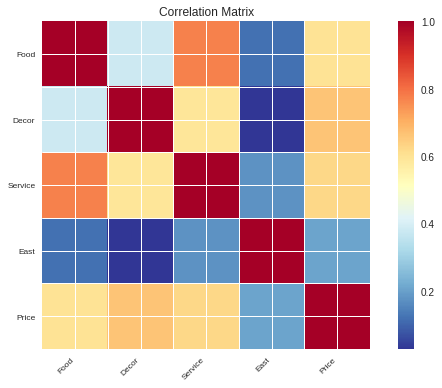

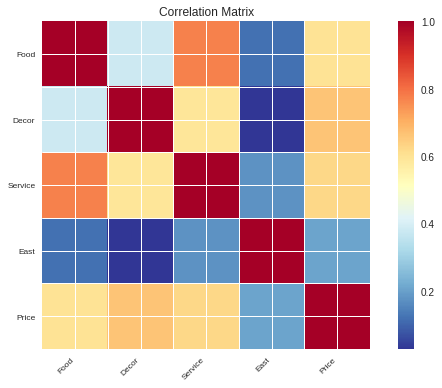

In [ ]:
corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
 title=None, normcolor=False, cmap='RdYlBu_r')

In [ ]:
print(corrMatrix)

             Food     Decor   Service      East     Price
Food     1.000000  0.383665  0.775263  0.120509  0.597124
Decor    0.383665  1.000000  0.591756  0.026960  0.663770
Service  0.775263  0.591756  1.000000  0.178831  0.626589
East     0.120509  0.026960  0.178831  1.000000  0.208335
Price    0.597124  0.663770  0.626589  0.208335  1.000000


#what
The fit method (.fit()) of the model object was called to 
fit the linear regression model to the data

In [ ]:
multiLinearModel = smf.ols(formula= 'Price ~ Food + Decor + Service + East', data = train_data)
multiLinearModResult = multiLinearModel.fit()


#what
We are printing out the summary of our model

The R-squared is a measure of how well our model fits the dataset in pepercentage  Rsquared is also basically our coefficent of determination and it is equals to 0.6 and this means that our independent variable describes 60% of our dependent.
Observing the coefficient, we can see that the function of our model is y=1.8306X1+1.871X2 -0.0002X3 + 2.8722X4 -28.7444
where y is our price, X1 is food, X2 decor, X3 service, X4 east.
This is the summary of the model we have developed.

In [ ]:
print(multiLinearModResult.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     41.97
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           1.84e-21
Time:                        15:20:40   Log-Likelihood:                -372.50
No. Observations:                 117   AIC:                             755.0
Df Residuals:                     112   BIC:                             768.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.7444      6.094     -4.717      0.0

Model Evaluation

# why
This helps us evaluate the performance of if model

In [ ]:
y_pred = multiLinearModResult.predict(X_test)

In [ ]:
compare_test = pd.concat([y_test, y_pred], axis=1)
compare_test.head()

,Price,0
63,49,45.260684
86,50,48.935180
145,52,55.148341
53,36,30.683759
60,53,54.399782


# what
The Rsquared of our model is being improved. This involves us converting the categorical column in the dataset to a dummy variable

#Why
in training a model which uses a machine learning algorithm , a numerical representation of our data is required. The value against each variable will be 1 or 0 depending on whether the variable is present or not. 

In [ ]:
nycDataCat = pd.get_dummies(nyc[['Restaurant']], drop_first=True, prefix='RES')
nycDataCat.head()

,RES_Anche Vivolo,RES_Andiamo,RES_Arno,RES_Artusi,RES_Baci,RES_Baraonda,RES_Barbaresco,RES_Barbetta,RES_Bardolino,RES_Basta Pasta,RES_Becco,RES_Bella Luna,RES_Bellini,RES_Bello,RES_Belluno,RES_Bice,RES_Biricchino,RES_Bondí Ristorante´,RES_Bottino,RES_Bravo Gianni,RES_Bruno Ristorante,RES_Cafe Trevi,RES_Caffe Cielo,RES_Caffe Grazie,RES_Campagna,RES_Campagnola,RES_Canaletto,RES_Cara Mia,RES_Carino Ristorante,RES_Casa Di Meglio,RES_Casa Mia,RES_Castellano,RES_Cellini,RES_Chianti,RES_Ciao Europa,RES_Cinque Terre,RES_Circo Osteria del,RES_Coco Pazzo,RES_Coco Pazzo Café,RES_Coco Pazzo Teatro,...,RES_Rainbow Grill,RES_Rao's,RES_Remi,RES_Ribollita,RES_Rino Trattoria,RES_Rossini's,RES_Rughetta,RES_Sal Anthony's,"RES_Sambuca, Trattoria",RES_San Domenico,RES_San Giusto,RES_San Pietro,RES_Scaletta,RES_Scalinatella,RES_Sette Mezzo,RES_Sette MoMA,RES_Sirabella's,RES_Sistina,RES_Spada,RES_Supreme Macaroni Co.,RES_Tello's Ristorante,RES_Teodora,RES_Tino's,RES_Tony's Di Napoli,RES_Torre di Pisa,RES_Trattoria Alba,RES_Trattoria Del Sogno,RES_Trattoria Dopo Teatro,RES_Trattoria Rustica,RES_Triangolo,RES_Trionfo,RES_Tuscan Square,RES_Vago Ristorante,RES_Veronica,RES_Via Oreto,RES_ViceVersa,RES_Vico,RES_Villa Berulia,RES_Vivolo,RES_Zucchero e Pomodori
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


in order to combine the numeric data with the dummy data, The numeric data will be stored in a variable called nycDataNum

In [ ]:
nycDataNum = nyc[['Food','Decor','Service','East']]
nycDataNum.shape

(168, 4)

# what
nycDataCat and nycDataNum  are concatinated into a single dataframe and storedit in the concat_x variable, then we saved the price column in the Y variable




The nycDataCat(dummy data) and nycDataNum(numeric data) contains all of the independent variables from our data set, so we need to combine them into one dataframw and we also need to separate our dependent variable from our independent variable and save it in a different variable(y)

In [ ]:
# Preparing the X variables
concat_x = pd.concat([nycDataCat, nycDataNum], axis=1)
print(concat_x.shape)
# Preparing the Y variable
Y = nycData['Price']
concat_x.head()

(168, 171)


,RES_Anche Vivolo,RES_Andiamo,RES_Arno,RES_Artusi,RES_Baci,RES_Baraonda,RES_Barbaresco,RES_Barbetta,RES_Bardolino,RES_Basta Pasta,RES_Becco,RES_Bella Luna,RES_Bellini,RES_Bello,RES_Belluno,RES_Bice,RES_Biricchino,RES_Bondí Ristorante´,RES_Bottino,RES_Bravo Gianni,RES_Bruno Ristorante,RES_Cafe Trevi,RES_Caffe Cielo,RES_Caffe Grazie,RES_Campagna,RES_Campagnola,RES_Canaletto,RES_Cara Mia,RES_Carino Ristorante,RES_Casa Di Meglio,RES_Casa Mia,RES_Castellano,RES_Cellini,RES_Chianti,RES_Ciao Europa,RES_Cinque Terre,RES_Circo Osteria del,RES_Coco Pazzo,RES_Coco Pazzo Café,RES_Coco Pazzo Teatro,...,RES_Rino Trattoria,RES_Rossini's,RES_Rughetta,RES_Sal Anthony's,"RES_Sambuca, Trattoria",RES_San Domenico,RES_San Giusto,RES_San Pietro,RES_Scaletta,RES_Scalinatella,RES_Sette Mezzo,RES_Sette MoMA,RES_Sirabella's,RES_Sistina,RES_Spada,RES_Supreme Macaroni Co.,RES_Tello's Ristorante,RES_Teodora,RES_Tino's,RES_Tony's Di Napoli,RES_Torre di Pisa,RES_Trattoria Alba,RES_Trattoria Del Sogno,RES_Trattoria Dopo Teatro,RES_Trattoria Rustica,RES_Triangolo,RES_Trionfo,RES_Tuscan Square,RES_Vago Ristorante,RES_Veronica,RES_Via Oreto,RES_ViceVersa,RES_Vico,RES_Villa Berulia,RES_Vivolo,RES_Zucchero e Pomodori,Food,Decor,Service,East
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,18,20,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,19,19,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,13,18,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,17,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,19,21,0


#what
splitting of data into train and test data

#WHY
 X and y are splitted into train and test data so that the train data can be used to train the model and the test data can be used to evaluate the performance of the model. Our test size is 30% of the total data and the random_state argument is used to ensure that the function produces the same result whenever the same set of data is used.

In [ ]:
X_trained, X_tested, y_trained, y_tested = train_test_split(X, Y, test_size=0.3, random_state=123)

#WHAT
 LinearRegression method from sklearn is used to define our model.linear_model library to define our model and we are using the fit method to trian the model

In [ ]:
new_Model = LinearRegression()
new_ModelResult = new_Model.fit(X_trained, y_trained)

We are using the score method to obtain r-squared for the Model(Coefficient of determination)

WHY: Our Coefficient of determination describes how much of our dependent variable is decribed by the independent variables. The r-squared for this model is 66.5%

In [ ]:
new_ModelResult.score(X_tested, y_tested)

0.6675082188884149

 We used the predict function on our model and we passed in the X_test values

WHY: Our model predicted the Price values(dependent variable) based on the test independent variables we passed to it. We then compared the predictions with the actual value

In [ ]:
new_Y_pred = new_ModelResult.predict(X_tested)
y_tested.head()

63     49
86     50
145    52
53     36
60     53
Name: Price, dtype: int64

In [ ]:
new_Y_pred

array([45.26068374, 48.93518017, 55.14834069, 30.68375884, 54.39978196,
       39.79631108, 36.16163361, 40.58468877, 33.28993352, 23.42928081,
       56.21689156, 46.04929056, 52.55566812, 38.76757917, 58.0335429 ,
       27.81182961, 38.75430618, 48.9086342 , 42.38829625, 43.45730539,
       31.44581969, 36.93765485, 56.20293117, 38.75384791, 48.92121978,
       52.5689411 , 48.92121978, 52.56917024, 45.27395673, 55.13483857,
       37.97874321, 38.74057493, 46.04929056, 40.57164492, 52.56871197,
       48.92167805, 39.79585282, 47.82658121, 50.73832938, 63.49814469,
       30.69703182, 36.92392359, 54.39955282, 35.09331187, 38.75453532,
       47.09083719, 43.44311587, 33.27643141, 49.710514  , 50.73832938,
       39.82308619])

# what
We used the OLS method from the statsmodels.api library to define our model and we trained using the fit method

#why
The model is defined because we need to develop a model that can predict the price of food based on all the remaining variables. The model is trained in order to understand the data and develop a function that can accurately predict the price of food.

In [ ]:
improved_model = smf.ols(formula= 'Price ~ Food + Decor + Service + East', data = train_data)
train_improved_model = improved_model.fit()

In [ ]:
print(train_improved_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     41.97
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           1.84e-21
Time:                        15:20:41   Log-Likelihood:                -372.50
No. Observations:                 117   AIC:                             755.0
Df Residuals:                     112   BIC:                             768.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.7444      6.094     -4.717      0.0

In [ ]:
from sklearn import tree

In [ ]:
model_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=0)
model_tree.fit(concat_x, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
model_tree.score(concat_x, Y)

0.8452380952380952

In [ ]:
model_tree.predict(concat_x)

array([43, 32, 34, 41, 54, 52, 34, 34, 39, 44, 35, 41, 52, 35, 47, 37, 45,
       57, 33, 45, 52, 51, 38, 50, 45, 35, 45, 35, 37, 65, 34, 51, 49, 51,
       62, 43, 51, 52, 57, 49, 33, 31, 41, 58, 44, 44, 37, 56, 58, 44, 46,
       40, 39, 36, 34, 54, 51, 41, 40, 24, 53, 31, 31, 49, 31, 48, 43, 29,
       37, 37, 37, 55, 49, 33, 52, 47, 43, 33, 33, 48, 50, 46, 38, 33, 38,
       37, 46, 54, 41, 37, 50, 60, 36, 54, 39, 35, 30, 41, 30, 25, 43, 35,
       57, 32, 51, 48, 36, 37, 31, 46, 33, 33, 43, 51, 19, 28, 22, 41, 32,
       29, 33, 45, 38, 52, 38, 47, 43, 40, 32, 65, 47, 65, 45, 46, 44, 40,
       46, 32, 23, 42, 29, 49, 53, 45, 63, 52, 40, 45, 38, 38, 42, 57, 39,
       43, 29, 42, 50, 34, 31, 38, 46, 42, 31, 31, 26, 31, 38, 34])

In [ ]:
Y

0      43
1      32
2      34
3      41
4      54
       ..
163    31
164    26
165    31
166    38
167    34
Name: Price, Length: 168, dtype: int64

In [ ]:
Y[9]

44

In [ ]:
model_tree.score(concat_x, Y)

0.8452380952380952